<a href="https://colab.research.google.com/github/cielcs/Bayesian-inference/blob/main/05_26_2024%E9%80%90%E6%AC%A1%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E5%AE%9Aexample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ベイズ推定
$$
P(θ|D) = \frac{P(D|θ) \cdot P(θ)}{P(D)}
$$

ここで：
- \( P(θ|D) \) は事象Dが起きたときに事象θが起こる確率（事後確率）。
- \( P(D|θ) \) は事象θが起きたときに事象Dが起こる確率（尤度）。
- \( P(θ) \) は事象θが起こる確率（事前確率）。
- \( P(D) \) は事象Dが起こる確率（周辺確率）。

## 逐次ベイズ推定
$$
P(θ|D_n) = \frac{P(x_n|θ) \cdot P(θ|D_{n-1})}{C}
$$

実現値x_i=0,1. 裏が出たら0表が出たら1  

θ∊[0,1]表が出る確率とする  

D_n =[x_1,x_2,...,x_n]  

ここで：
- \(P(θ|D_n) \) は事象Dが起きたときに事象θが起こる確率（事後分布）。
- \( P(x_n|θ) \) は事象θが起きたときに事象Dが起こる確率（尤度）。
- \( P(θ|D_{n-1}) \) は事象θが起こる確率（事前分布）。
- \( C \) は全てのθにおける積分が1になるように設定する正規化定数。

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

theta = sp.var("theta")
x = sp.var("x")

p_func_base = theta*x + (1-theta)*(1-x)

paramdist_0 = 1+0*theta
paramdist_0

1

In [26]:
# 1ステップ目
x1 = 0
lh_1 = p_func_base.subs(x,x1)
lh_1


1 - theta

In [16]:
paramdist_1 = paramdist_0 * lh_1
paramdist_1/= paramdist_1.integrate((theta,0,1))
paramdist_1

2 - 2*theta

In [17]:
# 2ステップ目
x2 = 1
lh_2 = p_func_base.subs(x,x2)
lh_2


theta

In [18]:
paramdist_2 = paramdist_1 * lh_2
paramdist_2/= paramdist_2.integrate((theta,0,1))
paramdist_2

3*theta*(2 - 2*theta)

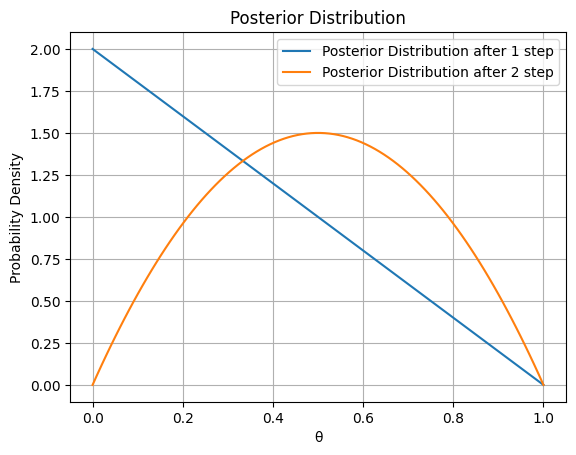

In [31]:
# 事後分布を評価する関数を作成
paramdist_1_func = sp.lambdify(theta, paramdist_1, "numpy")
paramdist_2_func = sp.lambdify(theta, paramdist_2, "numpy")
# プロット範囲を定義
theta_vals = np.linspace(0, 1, 100)

# 事後分布の値を計算
paramdist_1_vals = paramdist_1_func(theta_vals)
paramdist_2_vals = paramdist_2_func(theta_vals)

# プロット
plt.plot(theta_vals, paramdist_1_vals, label='Posterior Distribution after 1 step')
plt.plot(theta_vals, paramdist_2_vals, label='Posterior Distribution after 2 step')
plt.xlabel('θ')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution')
plt.legend()
plt.grid(True)
plt.show()
